In [1]:
import numpy as np  # Import NumPy library (Numpy kütüphanesini içe aktar)
import matplotlib.pyplot as plt  # Import Matplotlib for plotting (Grafik çizimi için Matplotlib'i içe aktar)

# Function to draw a plot (Bir grafik çizme fonksiyonu)
def draw(x1, x2):
    ln = plt.plot(x1, x2)  # Plot the data (Veriyi çiz)

# Sigmoid function definition (Sigmoid fonksiyonu tanımı)
def sigmoid(score):
    return 1 / (1 + np.exp(-score))  # Sigmoid function formula (Sigmoid fonksiyonunun formülü)

# Function to calculate error (Hata hesaplama fonksiyonu)
def calculate_error(line_parameters, points, y):
    n = points.shape[0]  # Number of points (Nokta sayısını al)
    p = sigmoid(points * line_parameters)  # Apply sigmoid to the linear combination (Lineer kombinasyona sigmoid uygula)
    
    # Cross entropy error calculation (Çapraz entropi hata hesaplama)
    cross_entropy = -(1 / n) * (np.log(p).T * y + np.log(1 - p).T * (1 - y))  
    return cross_entropy  # Return the calculated error (Hesaplanan hatayı döndür)

In [3]:
# Rastgele sayı üretimi için sabit bir tohum belirleniyor (tekrar üretilebilirlik için)
# Setting a fixed seed for random number generation (for reproducibility)
np.random.seed(0)

# Üretilecek veri noktalarının sayısı
# Number of points to generate
n_pts = 10

# Önyargı terimi için bir vektör oluşturuluyor (1'lerden oluşuyor)
# Creating a bias vector (all ones)
bias = np.ones(n_pts)

# Üst bölge için veri oluşturuluyor
# Generating data for the top region
# X değerleri için ortalama 10, standart sapma 2
# X values with mean 10 and standard deviation 2
# Y değerleri için ortalama 12, standart sapma 2
# Y values with mean 12 and standard deviation 2
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T

# Alt bölge için veri oluşturuluyor
# Generating data for the bottom region
# X değerleri için ortalama 5, standart sapma 2
# X values with mean 5 and standard deviation 2
# Y değerleri için ortalama 6, standart sapma 2
# Y values with mean 6 and standard deviation 2
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T

# Tüm veri noktaları birleştiriliyor
# Combining all data points
all_points = np.vstack((top_region, bottom_region))

# Başlangıç ağırlıkları ve önyargı değerleri tanımlanıyor
# Defining initial weights and bias
w1 = -0.1  # İlk ağırlık (weight 1)
w2 = -0.15  # İkinci ağırlık (weight 2)
b = 0  # Önyargı (bias)

# Doğru parametreleri bir matris olarak tanımlanıyor
# Defining line parameters as a matrix
line_param = np.matrix([w1, w2, b]).T

# Alt ve üst bölge noktalarına göre bir çizgi oluşturuluyor
# Creating a line based on points in the bottom and top regions
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])  # X koordinatları (X coordinates)
x2 = -b / w2 + x1 * (-w1 / w2)  # Y koordinatları (Y coordinates)

# Etiketler (labels) oluşturuluyor: Alt bölge için 0, üst bölge için 1
# Creating labels: 0 for bottom region, 1 for top region
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts * 2, 1)


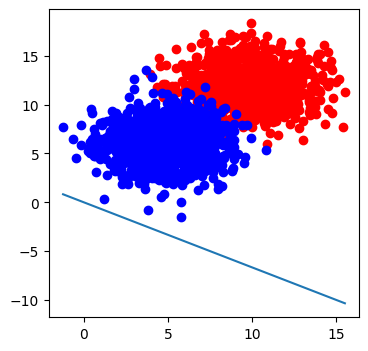

In [4]:
# Grafik oluşturma (Creating the plot)
_, ax = plt.subplots(figsize=(4, 4))  # Grafik boyutu ayarlanıyor (Setting the figure size)

# Üst bölgenin noktalarını kırmızı renkli olarak çiz
# Plotting points in the top region with red color
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')

# Alt bölgenin noktalarını mavi renkli olarak çiz
# Plotting points in the bottom region with blue color
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')

# Doğruyu çizmek için draw fonksiyonu çağrılıyor
# Calling the draw function to plot the line
draw(x1, x2)

# Grafiği göster
# Displaying the plot
plt.show()


In [5]:
# Hata fonksiyonunu hesapla ve sonucu yazdır
# Calculate the error function and print the result
print(calculate_error(line_param, all_points, y))


[[0.84032402]]
